In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the Data


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/Shuffled_returns.CSV", parse_dates=["Date"], index_col=0)

df

,Date,Fin,PerSv,Books,Boxes,Trans,BldMt,Meals,Toys,LabEq,Comps,Whlsl,Agric,Autos,Other,Ships,Oil,Chips,Util,Telcm,Food,Txtls,Mines,BusSv,Drugs,Soda,Banks,Gold,Aero,Rubbr,Paper,ElcEq,Steel,FabPr,Hlth,Hshld,MedEq,Fun,Guns,Clths,Rtail,Cnstr,Mach,Beer,Chems,Coal,RlEst,Insur,Smoke
0,2019-10-02,-2.36,-1.12,-1.51,-2.10,-1.98,-1.59,-1.59,-1.51,-2.24,-1.72,-1.40,-2.05,-2.29,-1.61,-3.09,-2.74,-1.96,-1.31,-1.00,-1.58,-1.81,-2.37,-1.72,-1.16,-2.78,-1.99,1.11,-2.06,-1.75,-1.55,-3.11,-2.48,-1.62,-1.34,-2.14,-1.82,-0.76,-1.54,-1.65,-1.66,-0.63,-1.79,-2.20,-1.61,0.55,-2.07,-1.38,-1.77
1,2019-10-03,-0.01,0.24,-0.69,0.14,0.53,0.39,0.85,2.46,1.34,1.01,0.06,-0.26,-0.38,0.76,0.26,1.34,1.30,0.35,0.20,0.72,1.65,0.26,1.40,1.22,1.36,0.37,0.52,0.91,0.58,-0.14,1.14,0.24,-0.78,0.47,0.49,1.61,0.10,0.42,0.71,0.38,0.11,0.59,1.22,0.53,0.58,0.41,0.12,0.62
2,2019-10-04,1.88,0.16,1.37,1.49,0.94,1.41,0.91,0.51,2.09,0.38,0.74,-2.69,0.21,1.20,-0.25,0.59,2.17,1.45,1.34,1.51,1.31,0.67,1.47,1.36,1.40,1.77,0.59,1.14,1.37,0.58,1.15,0.99,0.65,1.22,1.71,1.28,1.10,1.26,1.07,1.03,1.97,1.37,1.32,0.60,0.11,1.28,1.89,2.00
3,2019-10-07,-0.46,-0.32,-0.65,-0.27,-0.15,-0.99,-0.36,-0.07,-0.91,0.21,-0.39,0.47,-0.08,-0.41,-0.66,-0.92,-0.37,-0.50,0.28,-0.72,0.14,0.09,-0.30,-0.34,-1.28,-0.40,-0.09,0.03,-0.31,-1.13,-1.04,-0.76,-1.14,0.25,-0.90,-0.85,-0.21,-0.31,-0.25,-0.36,-0.38,-0.82,-1.44,-0.61,-0.72,-0.26,-0.50,-0.38
4,2019-10-08,-1.64,-1.86,-3.19,-1.60,-1.93,-1.46,-0.84,-0.34,-3.97,-2.55,-1.08,0.66,-1.59,-1.77,-1.68,-1.71,-1.83,-1.17,-1.08,-1.26,-1.36,-1.12,-1.68,-1.35,-0.48,-2.06,2.03,-0.86,-1.85,-1.96,-2.26,-1.90,-1.93,-2.00,-1.56,-2.78,-1.78,-0.49,-1.24,-0.92,-0.37,-2.17,-0.74,-2.27,-2.29,-1.41,-1.72,-0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-06-24,-3.32,-3.73,-2.94,-2.69,-3.50,-4.11,-2.32,-3.61,-2.91,-2.08,-3.38,-4.35,-3.96,-2.70,-5.21,-5.62,-1.90,-1.27,-2.26,-1.61,-4.37,-2.85,-2.53,-2.02,-2.35,-4.12,-1.05,-4.97,-1.21,-3.16,-3.24,-4.61,-4.37,-3.67,-1.57,-4.39,-3.23,-3.10,-2.82,-1.41,-3.87,-2.96,-1.99,-3.10,-0.80,-5.29,-3.26,-2.08
184,2020-06-25,2.30,-0.35,1.13,0.35,1.00,1.60,-0.32,0.16,1.26,0.76,0.76,0.74,1.79,1.25,1.24,1.93,1.00,-0.92,0.36,0.45,-0.16,1.67,1.29,1.30,0.79,2.83,0.37,-0.38,1.47,1.07,1.52,2.37,2.86,1.62,0.92,0.21,0.80,0.97,0.70,0.34,-0.24,1.69,0.96,1.88,-0.18,2.04,2.17,0.73
185,2020-06-26,-4.21,-1.87,-1.34,-1.19,-2.56,-0.97,-2.21,-0.69,-1.42,0.43,-1.86,-1.04,-2.30,-1.94,-2.65,-3.64,-2.49,-1.37,-2.18,-1.96,-2.89,-2.25,-2.72,-1.48,-2.78,-4.86,1.21,-2.55,-1.03,-1.34,-0.88,-3.17,4.46,-1.31,-1.93,-0.79,-4.54,-1.49,-5.13,-1.79,-1.88,-1.81,-1.99,-1.82,-3.91,-3.14,-2.68,-3.01
186,2020-06-29,1.20,3.12,2.08,2.59,2.65,3.57,2.62,0.48,1.11,0.74,2.94,1.22,4.23,1.55,3.00,1.65,1.77,1.93,2.19,1.50,5.41,2.13,1.00,0.26,1.80,1.64,0.53,7.81,1.90,2.39,2.56,3.40,4.25,1.63,2.08,1.66,1.83,2.87,3.29,0.78,3.54,2.30,2.01,2.36,2.41,2.62,1.42,2.53


Data Transformation

In [ ]:
import numpy as np

p = 48 #number of assets

original_R = df.iloc[:,1:1+p].values

R = original_R - np.mean(original_R) # demean

identity_matrix = np.identity(p-1)

ones = np.repeat(-1, p-1)

N = np.row_stack((identity_matrix, ones))

X = np.dot(R, N)

print (R.shape)
print (N)
print (X.shape)

(188, 48)
[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  1.]
 [-1. -1. -1. ... -1. -1. -1.]]
(188, 47)


In [ ]:
W_EW = np.repeat(1/p, p).reshape(-1,1)

y = np.dot(R, W_EW)

y.shape

(188, 1)

# Moving Window

In [ ]:
train_X_list = []
train_y_list = []
return_list = []
y_true = []

observations = 63

for i in range(observations, len(df)):
    
    train_X_list.append(X[i-observations:i])
    
    train_y_list.append(y[i-observations:i])
    
    return_list.append(original_R[i])

    y_true.append(y[i])

len(y_true)

125

# Debugging 

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
model = model.fit(train_X_list[0], train_y_list[0]) # 1st set of 63 observations (Before 1st Jan)

In [ ]:
model.score(train_X_list[0], train_y_list[0])

0.4209346574075487

In [ ]:
beta = model.coef_

beta

array([[ 0.02924756, -0.27089319,  0.07476694,  0.05566779, -0.08379659]])

In [ ]:
weight = W_EW - np.dot(N, beta.reshape(-1,1))

weight

array([[ 0.13741911],
       [ 0.43755985],
       [ 0.09189972],
       [ 0.11099888],
       [ 0.25046326],
       [-0.02834083]])

In [ ]:
np.dot(original_R[63], weight)

array([-1.23149844])

# Lasso

6 Industries

Text(0, 0.5, 'mean-squared-error')

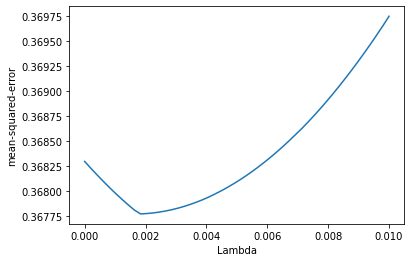

In [ ]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

alphas = np.linspace(1e-10, 0.01)

model = LassoCV(cv=10, max_iter=10000, 
                alphas=alphas, 
                fit_intercept=False, 
                normalize=False)

model = model.fit(train_X_list[0], train_y_list[0].ravel())

lambda_used_L = model.alphas_

mse_list = np.mean(model.mse_path_, axis = 1)

plt.plot(lambda_used_L, mse_list)
plt.xlabel("Lambda")
plt.ylabel("mean-squared-error")

24 Industries

Text(0, 0.5, 'mean-squared-error')

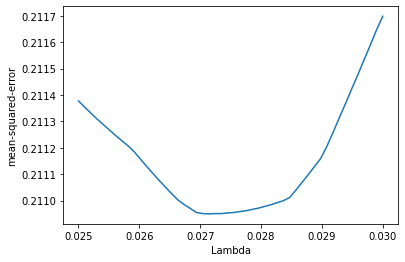

In [ ]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

alphas = np.linspace(0.025, 0.03)

model = LassoCV(cv=10, max_iter=10000, 
                alphas=alphas, 
                fit_intercept=False, 
                normalize=False)

model = model.fit(train_X_list[0], train_y_list[0].ravel())

lambda_used_L = model.alphas_

mse_list = np.mean(model.mse_path_, axis = 1)

plt.plot(lambda_used_L, mse_list)
plt.xlabel("Lambda")
plt.ylabel("mean-squared-error")

48 Industries

Text(0, 0.5, 'mean-squared-error')

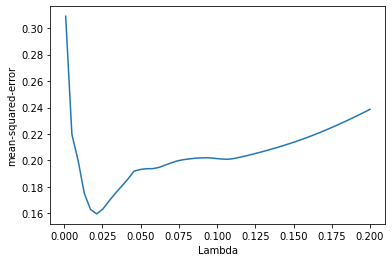

In [ ]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

alphas = np.linspace(1e-3, 0.2)

model = LassoCV(cv=10, max_iter=100000, 
                alphas=alphas, 
                fit_intercept=False, 
                normalize=False)

model = model.fit(train_X_list[0], train_y_list[0].ravel())

lambda_used_L = model.alphas_

mse_list = np.mean(model.mse_path_, axis = 1)

plt.plot(lambda_used_L, mse_list)
plt.xlabel("Lambda")
plt.ylabel("mean-squared-error")

# Ridge

6 Industries

Text(0, 0.5, 'mean-squared-error')

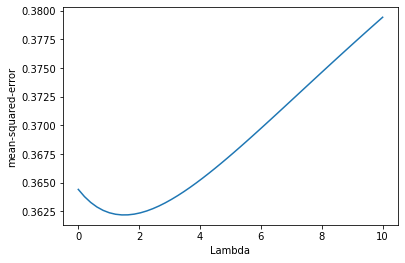

In [ ]:
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt

alphas = np.linspace(1e-4, 10)

model = RidgeCV(alphas=alphas, 
                store_cv_values=True,
                fit_intercept=False, 
                normalize=False)

model = model.fit(train_X_list[0], train_y_list[0])

mse = model.cv_values_

mse_list = np.mean(mse, axis = 0)

plt.plot(alphas, mse_list.ravel())
plt.xlabel("Lambda")
plt.ylabel("mean-squared-error")

24 Industries

Text(0, 0.5, 'mean-squared-error')

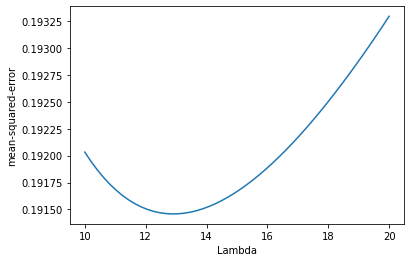

In [ ]:
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt

alphas = np.linspace(10, 20)

model = RidgeCV(alphas=alphas, 
                store_cv_values=True, 
                fit_intercept=False, 
                normalize=False)

model = model.fit(train_X_list[0], train_y_list[0])

mse = model.cv_values_

mse_list = np.mean(mse, axis = 0)

plt.plot(alphas, mse_list.ravel())
plt.xlabel("Lambda")
plt.ylabel("mean-squared-error")

48 Industries

Text(0, 0.5, 'mean-squared-error')

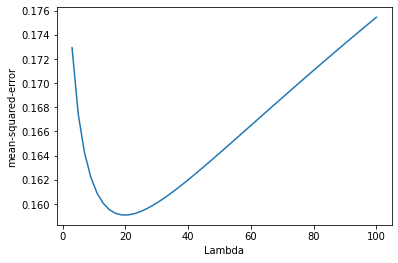

In [ ]:
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt

alphas = np.linspace(3, 100)

model = RidgeCV(alphas=alphas, 
                store_cv_values=True, 
                fit_intercept=False, 
                normalize=False)

model = model.fit(train_X_list[0], train_y_list[0])

mse = model.cv_values_

mse_list = np.mean(mse, axis = 0)

plt.plot(alphas, mse_list.ravel())
plt.xlabel("Lambda")
plt.ylabel("mean-squared-error")

# MinVar Portfolio

In [ ]:
from sklearn.linear_model import LinearRegression

result_beta_mv = []
result_weight_mv = []
total_ret_mv = []
in_sample_variance_list = []

for X_train, y_train, ret in zip(train_X_list, train_y_list, return_list):
  model = LinearRegression(fit_intercept=False,
                           normalize=False)
  model = model.fit(X_train, y_train)
  
  beta = model.coef_
  result_beta_mv.extend(beta)

  weight = W_EW - np.dot(N, beta.reshape(-1,1))
  result_weight_mv.append(weight)

  ret_OS =  np.dot(ret, weight)
  total_ret_mv.extend(ret_OS)

  in_sample_variance_list.append((np.std(y_train))**2)

In [ ]:
in_sample_variance = np.mean(in_sample_variance_list)

out_of_sample_variance = (np.std(total_ret_mv))**2

print(in_sample_variance/out_of_sample_variance) 

0.6175327493696339


In [ ]:
np.sum(total_ret_mv) # total returns over 6 months

-51.39787134771618

# Lasso Portfolio

In [ ]:
from sklearn.linear_model import LassoCV

result_beta_ls = []
result_weight_ls = []
total_ret_ls = []
lambda_list_ls = []
in_sample_variance_list = []

for X_train, y_train, ret in zip(train_X_list, train_y_list, return_list):
  model = LassoCV(cv=10, max_iter=10000, 
                fit_intercept=False, 
                normalize=False)
  model = model.fit(X_train, y_train.ravel())

  lambda_list_ls.append(model.alpha_)
  
  beta = model.coef_
  result_beta_ls.extend(beta)

  weight = W_EW - np.dot(N, beta.reshape(-1,1))
  result_weight_ls.append(weight)

  ret_OS =  np.dot(ret, weight)
  total_ret_ls.extend(ret_OS)

  in_sample_variance_list.append((np.std(y_train))**2)

In [ ]:
in_sample_variance = np.mean(in_sample_variance_list)

out_of_sample_variance = (np.std(total_ret_ls))**2

print(in_sample_variance/out_of_sample_variance)

1.392026524093915


In [ ]:
np.sum(total_ret_ls)

-14.00906267194408

# Ridge Portfolio

In [ ]:
from sklearn.linear_model import RidgeCV

result_beta_rd = []
result_weight_rd = []
total_ret_rd = []
lambda_list_rd = []
in_sample_variance_list = []

for X_train, y_train, ret in zip(train_X_list, train_y_list, return_list):
  
  model = RidgeCV(cv=10, 
                  alphas=np.linspace(1e-3, 100), 
                  fit_intercept=False, 
                  normalize=False)
  
  model = model.fit(X_train, y_train.ravel())

  lambda_list_rd.append(model.alpha_)
  
  beta = model.coef_
  result_beta_rd.extend(beta)

  weight = W_EW - np.dot(N, beta.reshape(-1,1))
  result_weight_rd.append(weight)

  ret_OS =  np.dot(ret, weight)
  total_ret_rd.extend(ret_OS)

  in_sample_variance_list.append((np.std(y_train))**2)

In [ ]:
in_sample_variance = np.mean(in_sample_variance_list)

out_of_sample_variance = (np.std(total_ret_rd))**2

print(in_sample_variance/out_of_sample_variance)

1.974005836755092


In [ ]:
np.sum(total_ret_rd)

2.6171441675920457

# Equal Weight

In [ ]:
np.array(return_list).shape

(125, 48)

In [ ]:
total_ret_ew = np.dot(np.array(return_list), W_EW)

total_ret_ew.shape

(125, 1)

In [ ]:
np.sum(total_ret_ew)

-3.6552083333333263